# $$ \mathrm{Network-Analysis} $$

In [1]:
import sys
#sys.path.append("/home/andreasko/projects/SFB910_B10_Simulation_disease_spreading_on_networks")
sys.path.append("/usr/lib/python2.7/dist-packages")

In [2]:
import numpy            as np
import graph_tool.all as gt
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
g = gt.load_graph("HIT.xml.gz")
pw = g.edge_properties["weight"]
iw = g.edge_properties["inv_weight"]
rw = g.edge_properties["rw_weight"]
print "number of nodes ", g.num_vertices()
print "number of edges ", g.num_edges()

number of nodes  97980
number of edges  315333


# $$ -------------------------------\\ Betweenness-Centrality$$

In [4]:
g.set_vertex_filter( gt.label_largest_component(g, directed=True) )
node_betweenness, edge_betweenness = gt.betweenness(g, weight=rw, norm=True)
data = np.sort(node_betweenness.fa)
values  = np.unique(data)
pdf = [np.count_nonzero(data == w) for w in values]
cdf = np.cumsum(pdf).astype(float)
cdf *= 1./cdf[-1]
ccdf = 1.-cdf

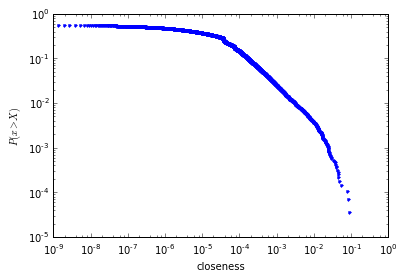

In [5]:
%matplotlib inline
plt.figure()
plt.loglog(values,ccdf,'b.')
plt.xlabel('betweenness')
plt.ylabel(r'$P(x>X)$')

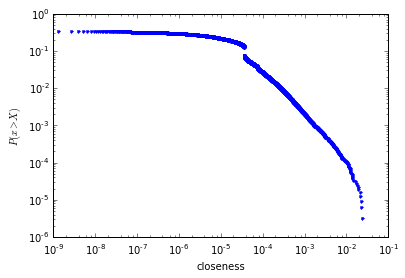

In [6]:
%matplotlib inline
data = np.sort(edge_betweenness.fa)
values  = np.unique(data)
pdf = [np.count_nonzero(data == w) for w in values]
cdf = np.cumsum(pdf).astype(float)
cdf *= 1./cdf[-1]
ccdf = 1.-cdf
plt.figure()
plt.loglog(values,ccdf,'b.')
plt.xlabel('betweenness')
plt.ylabel(r'$P(x>X)$')

999


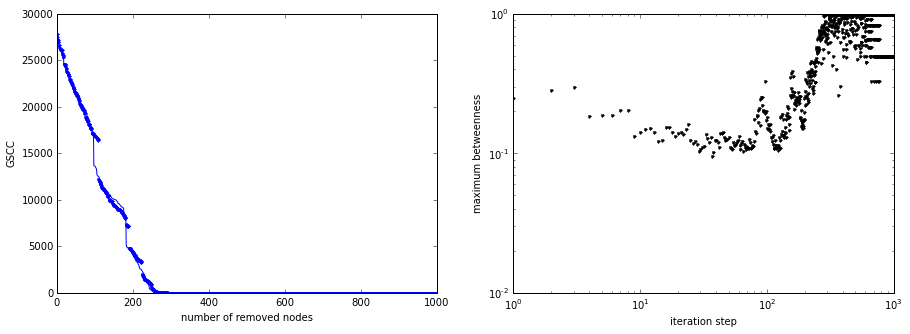

In [6]:
%matplotlib inline
result = np.load('betweenness_centrality_filtered.npz')
size = result['size']
max_degree = result['max_score']
N = len(size)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(range(N),size,'b-')
ax1.set_ylabel('GSCC')
ax1.set_xlabel('number of removed nodes')

ax2 = plt.subplot(122)
ax2.loglog(range(N),max_degree,'k.')
ax2.set_xlabel('iteration step')
ax2.set_ylabel('maximum betweenness')

result = np.load('betweenness_centrality_fa.npz')
size = result['size']
ax1.plot(range(N),size,'b.')
print result['N']

# $$ -------------------------------\\ Submit~a~job $$

In [7]:
from subprocess import Popen, PIPE, check_call
fname = "/home/andreasko/netzwerk_analyse/"
process = Popen("qsub -o %s -m e -mem 4 -speed 3 -numcpus 8 -env PYTHONPATH=%s -args '%s' job_betweenness_centrality"
      %(fname+"betweenness_centrality", "$PYTHONPATH:.",fname), shell=True, stdout=PIPE, stderr=PIPE)
print process.stdout.read()
print process.stderr.read()

 ___________________________________________
/ ----------------------------------------- \
| | DIE Q INFORMIERT:                     | |
| | Condor under normal Operation   !     | |
| | Die Option speed option wurde geändert| |
\ ----------------------------------------- /
 -------------------------------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||
This is qpy-condor wrapper for qsub.
send comments or bug-reports to root@itp.tu-berlin.de
Set memtype to 4
Set speed type to 3
Request 8 cores.
Add environmental variables 'PYTHONPATH=/usr/glocal/lib64/python2.7/site-packages:/usr/local/lib64/python2.7/site-packages:.' to executed job.
Pass Argument '/home/andreasko/netzwerk_analyse/' to submitted binary.
Workgroup agschoell detected!

Preparing submission file, please wait
Output file: /home/andreasko/netzwerk_analyse/betweenness_centrality
Job prepared with QCONDOR=1;PATH=/home/andreasko/anaconda/b